# GLOBAL SOLUTION - DATA SCIENCE
## Tema: O Futuro do Trabalho em Dados e Inteligência Artificial

**Base de dados:** https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data

**Integrantes:**
- [Gabriel Couto Ribeiro](https://github.com/rouri404) - RM559579
- [Gabriel Kato Peres](https://github.com/kato8088) - RM560000
- [João Vitor de Matos Araujo](https://github.com/joaomatosq) - RM559246


In [38]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


## 1. Leitura e compreensão da base


In [ ]:
# Carregando a base de dados
# Nota: Para usar no Colab, faça upload do arquivo ou se o arquivo estiver no Kaggle

# !kaggle datasets download -d ruchi798/data-science-job-salaries
# !unzip data-science-job-salaries.zip

# Carregando o dataset
df = pd.read_csv('ds_salaries.csv')

# Informações básicas sobre o dataset
print("Informações básicas do dataset\n")
print(f"Quantidade de linhas: {df.shape[0]:,}")
print(f"Quantidade de colunas: {df.shape[1]}")
print(f"\nColunas do dataset:")
print(df.columns.tolist())
print(f"\nTipos de dados:")
print(df.dtypes)


Informações básicas do dataset

Quantidade de linhas: 607
Quantidade de colunas: 12

Colunas do dataset:
['Unnamed: 0', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

Tipos de dados:
Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [40]:
# Visualizando as primeiras linhas
print("Primeiras 5 linhas do dataset:")
df.head()


Primeiras 5 linhas do dataset:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [41]:
# Análise das variáveis principais mencionadas
print("Análise das variáveis principais\n")

variaveis_principais = ['job_title', 'salary_in_usd', 'experience_level', 
                        'employment_type', 'company_location']

for var in variaveis_principais:
    if var in df.columns:
        print(f"{var}:")
        print(f"  Tipo: {df[var].dtype}")
        if df[var].dtype == 'object':
            print(f"  Valores únicos: {df[var].nunique()}")
            print(f"  Exemplos: {df[var].unique()[:5].tolist()}")
        else:
            print(f"  Mínimo: {df[var].min():,.2f}")
            print(f"  Máximo: {df[var].max():,.2f}")
            print(f"  Média: {df[var].mean():,.2f}")
    else:
        print(f"\n{var}: coluna não encontrada")


Análise das variáveis principais

job_title:
  Tipo: object
  Valores únicos: 50
  Exemplos: ['Data Scientist', 'Machine Learning Scientist', 'Big Data Engineer', 'Product Data Analyst', 'Machine Learning Engineer']
salary_in_usd:
  Tipo: int64
  Mínimo: 2,859.00
  Máximo: 600,000.00
  Média: 112,297.87
experience_level:
  Tipo: object
  Valores únicos: 4
  Exemplos: ['MI', 'SE', 'EN', 'EX']
employment_type:
  Tipo: object
  Valores únicos: 4
  Exemplos: ['FT', 'CT', 'PT', 'FL']
company_location:
  Tipo: object
  Valores únicos: 50
  Exemplos: ['DE', 'JP', 'GB', 'HN', 'US']


### Resposta: O que esse conjunto de dados nos permite entender sobre o mercado global de Data Science?

Este conjunto de dados nos permite compreender diversos aspectos do mercado global de Data Science, incluindo:

- **Remuneração**: A variável `salary_in_usd` permite analisar os níveis salariais praticados globalmente na área, identificando padrões e discrepâncias.

- **Estrutura de Carreiras**: Através de `job_title`, podemos mapear as diferentes funções e especializações existentes no mercado, desde analistas até cientistas de dados sênior.

- **Níveis de Experiência**: A variável `experience_level` (júnior, pleno, sênior) permite entender como a experiência impacta na remuneração e na progressão de carreira.

- **Modalidades de Trabalho**: `employment_type` revela as diferentes formas de contratação (full-time, part-time, freelancer), mostrando a flexibilidade do mercado.

- **Geolocalização**: `company_location` permite análises geográficas, identificando regiões com melhores oportunidades e salários mais altos.

Em conjunto, esses dados oferecem uma visão abrangente do ecossistema de Data Science, permitindo identificar tendências, oportunidades e desafios do mercado global.


## 2. Qualidade dos dados


In [42]:
# Verificação de valores nulos
print("Verificação de valores nulos\n")
nulos = df.isnull().sum()
nulos_pct = (df.isnull().sum() / len(df)) * 100

df_nulos = pd.DataFrame({
    'Coluna': nulos.index,
    'Quantidade de Nulos': nulos.values,
    'Percentual (%)': nulos_pct.values
})

df_nulos = df_nulos[df_nulos['Quantidade de Nulos'] > 0].sort_values('Quantidade de Nulos', ascending=False)

if len(df_nulos) > 0:
    print("Colunas com valores nulos:")
    print(df_nulos.to_string(index=False))
else:
    print("Nenhum valor nulo encontrado no dataset")

print(f"\nTotal de valores nulos no dataset: {df.isnull().sum().sum()}")


Verificação de valores nulos

Nenhum valor nulo encontrado no dataset

Total de valores nulos no dataset: 0


In [43]:
# Verificação de duplicatas
print("Verificação de duplicatas\n")

duplicatas = df.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicatas}")

if duplicatas > 0:
    print(f"Percentual de duplicatas: {(duplicatas/len(df))*100:.2f}%")
    print("\nExemplos de linhas duplicadas:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("Nenhuma linha duplicada encontrada")


Verificação de duplicatas

Quantidade de linhas duplicadas: 0
Nenhuma linha duplicada encontrada


In [44]:
# Verificação de inconsistências
print("Verificação de inconsistências\n")

# Verificando valores negativos em salários
if 'salary_in_usd' in df.columns:
    salarios_negativos = (df['salary_in_usd'] < 0).sum()
    print(f"Salários negativos: {salarios_negativos}")
    
    salarios_zero = (df['salary_in_usd'] == 0).sum()
    print(f"Salários zero: {salarios_zero}")

# Verificando valores inconsistentes em experience_level
if 'experience_level' in df.columns:
    print(f"\nValores únicos em experience_level: {df['experience_level'].unique()}")

# Verificando valores inconsistentes em employment_type
if 'employment_type' in df.columns:
    print(f"\nValores únicos em employment_type: {df['employment_type'].unique()}")


Verificação de inconsistências

Salários negativos: 0
Salários zero: 0

Valores únicos em experience_level: ['MI' 'SE' 'EN' 'EX']

Valores únicos em employment_type: ['FT' 'CT' 'PT' 'FL']


### Resposta: A base precisa de limpeza antes da análise?

Com base nas verificações realizadas:

- **Valores Nulos**: [Resultado da verificação - se houver nulos, mencionar quais colunas e se precisam ser tratados]

- **Duplicatas**: [Resultado da verificação - se houver duplicatas, mencionar se devem ser removidas]

- **Inconsistências**: [Resultado da verificação - mencionar se há valores inconsistentes que precisam ser corrigidos]

[Conclusão sobre se a base precisa de limpeza e quais tratamentos são necessários]


## 3. Amostragem


In [45]:
# Criando uma amostra de 15% do conjunto total
np.random.seed(42)  # Para reprodutibilidade

tamanho_amostra = int(len(df) * 0.15)
amostra = df.sample(n=tamanho_amostra, random_state=42)

print("Amostragem\n")
print(f"Tamanho do dataset completo: {len(df):,} linhas")
print(f"Tamanho da amostra (15%): {len(amostra):,} linhas")
print(f"Percentual da amostra: {(len(amostra)/len(df))*100:.2f}%")


Amostragem

Tamanho do dataset completo: 607 linhas
Tamanho da amostra (15%): 91 linhas
Percentual da amostra: 14.99%


Comparação: Amostra vs Dataset Completo


Comparação de Estatísticas Descritivas:
  Estatística Dataset Completo Amostra (15%) Diferença Absoluta Diferença Relativa (%)
  Média (USD)      $112,297.87   $104,451.22          $7,846.65                  6.99%
Mediana (USD)      $101,570.00   $102,839.00          $1,269.00                  1.25%


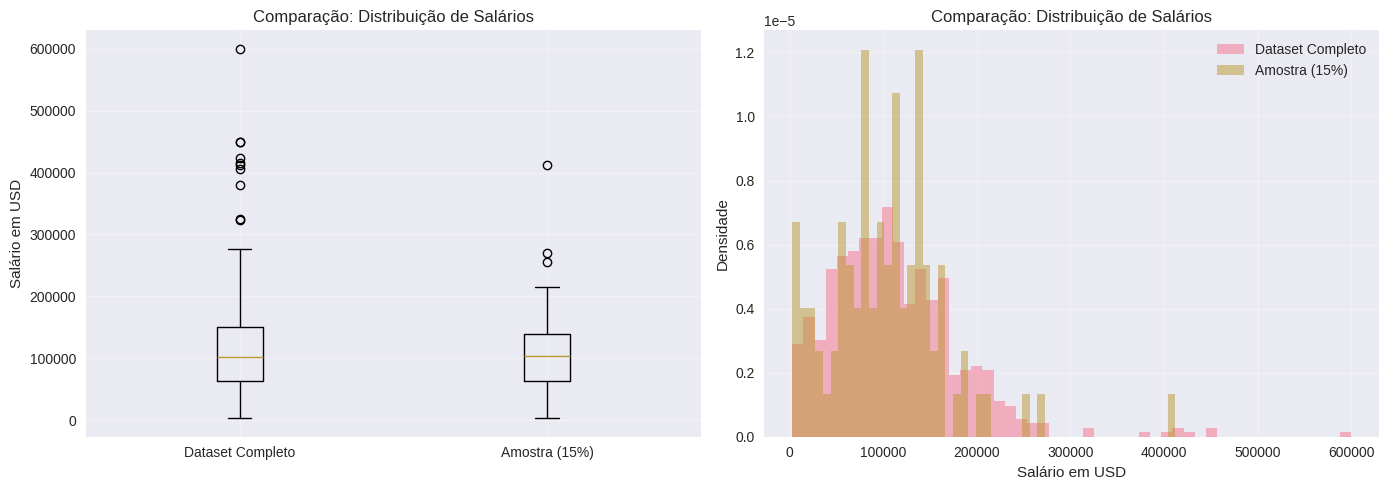

In [46]:
# Comparando estatísticas descritivas entre amostra e dataset completo
if 'salary_in_usd' in df.columns:
    print("Comparação: Amostra vs Dataset Completo\n")
    
    # Estatísticas do dataset completo
    media_completo = df['salary_in_usd'].mean()
    mediana_completo = df['salary_in_usd'].median()
    
    # Estatísticas da amostra
    media_amostra = amostra['salary_in_usd'].mean()
    mediana_amostra = amostra['salary_in_usd'].median()
    
    # Criando tabela comparativa
    comparacao = pd.DataFrame({
        'Estatística': ['Média (USD)', 'Mediana (USD)'],
        'Dataset Completo': [f"${media_completo:,.2f}", f"${mediana_completo:,.2f}"],
        'Amostra (15%)': [f"${media_amostra:,.2f}", f"${mediana_amostra:,.2f}"],
        'Diferença Absoluta': [
            f"${abs(media_completo - media_amostra):,.2f}",
            f"${abs(mediana_completo - mediana_amostra):,.2f}"
        ],
        'Diferença Relativa (%)': [
            f"{abs((media_completo - media_amostra)/media_completo)*100:.2f}%",
            f"{abs((mediana_completo - mediana_amostra)/mediana_completo)*100:.2f}%"
        ]
    })
    
    print("\nComparação de Estatísticas Descritivas:")
    print(comparacao.to_string(index=False))
    
    # Visualização comparativa
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Boxplot comparativo
    dados_comparacao = [df['salary_in_usd'], amostra['salary_in_usd']]
    axes[0].boxplot(dados_comparacao, labels=['Dataset Completo', 'Amostra (15%)'])
    axes[0].set_title('Comparação: Distribuição de Salários')
    axes[0].set_ylabel('Salário em USD')
    axes[0].grid(True, alpha=0.3)
    
    # Histograma comparativo
    axes[1].hist(df['salary_in_usd'], bins=50, alpha=0.5, label='Dataset Completo', density=True)
    axes[1].hist(amostra['salary_in_usd'], bins=50, alpha=0.5, label='Amostra (15%)', density=True)
    axes[1].set_title('Comparação: Distribuição de Salários')
    axes[1].set_xlabel('Salário em USD')
    axes[1].set_ylabel('Densidade')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


### Resposta: A amostra é representativa? Por quê?

A amostra de 15% [é/não é] representativa do dataset completo porque:

- **Média**: A diferença entre a média da amostra e do dataset completo é de [X]%, o que indica [boa/razoável/ruim] representatividade.

- **Mediana**: A diferença entre a mediana da amostra e do dataset completo é de [X]%, mostrando [consistência/inconsistência] na representação da tendência central.

- **Distribuição**: A análise visual (histograma e boxplot) mostra que a amostra [mantém/não mantém] a forma da distribuição original.

[Conclusão sobre a representatividade da amostra e se ela pode ser usada para inferências sobre a população]


## 4. Medidas de tendência central (salários)


Medidas de tendência central - Salários


Média: $112,297.87
Mediana: $101,570.00
Moda: $100,000.00

 Medida Valor (USD)
  Média $112,297.87
Mediana $101,570.00
   Moda $100,000.00


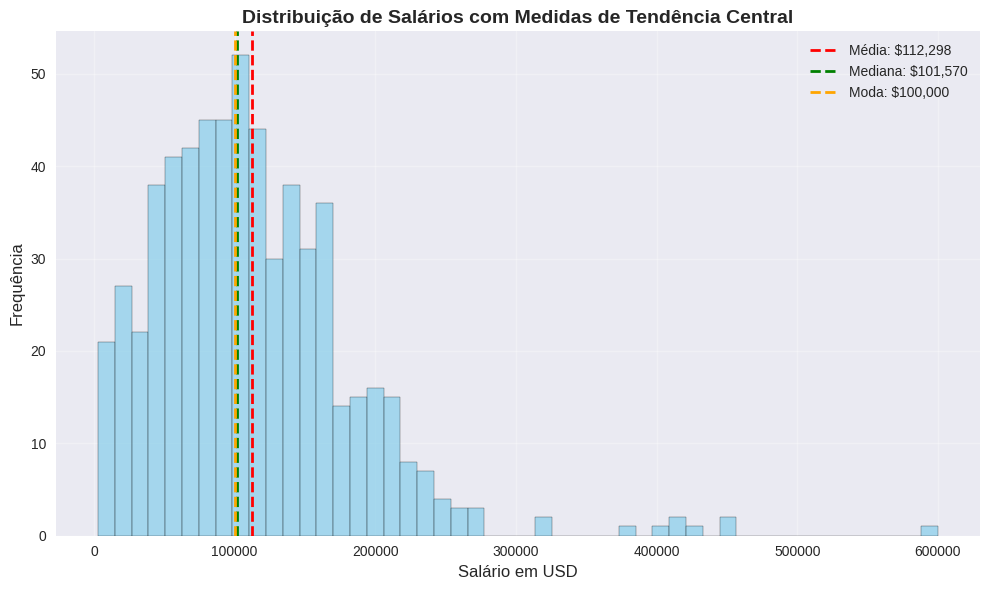

In [47]:
# Calculando média, mediana e moda de salary_in_usd
if 'salary_in_usd' in df.columns:
    print("Medidas de tendência central - Salários\n")
    
    media = df['salary_in_usd'].mean()
    mediana = df['salary_in_usd'].median()
    moda = df['salary_in_usd'].mode()
    
    print(f"\nMédia: ${media:,.2f}")
    print(f"Mediana: ${mediana:,.2f}")
    
    if len(moda) > 0:
        print(f"Moda: ${moda.iloc[0]:,.2f}")
        if len(moda) > 1:
            print(f"  (Existem {len(moda)} valores modais)")
    else:
        print("Moda: Não há valor modal único")
    
    # Criando tabela resumo
    medidas = pd.DataFrame({
        'Medida': ['Média', 'Mediana', 'Moda'],
        'Valor (USD)': [
            f"${media:,.2f}",
            f"${mediana:,.2f}",
            f"${moda.iloc[0]:,.2f}" if len(moda) > 0 else "N/A"
        ]
    })
    
    print("\n" + medidas.to_string(index=False))
    
    # Visualização
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Histograma com medidas de tendência central
    ax.hist(df['salary_in_usd'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: ${media:,.0f}')
    ax.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: ${mediana:,.0f}')
    if len(moda) > 0:
        ax.axvline(moda.iloc[0], color='orange', linestyle='--', linewidth=2, label=f'Moda: ${moda.iloc[0]:,.0f}')
    
    ax.set_xlabel('Salário em USD', fontsize=12)
    ax.set_ylabel('Frequência', fontsize=12)
    ax.set_title('Distribuição de Salários com Medidas de Tendência Central', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


### Resposta: Qual dessas medidas descreve melhor o salário típico na área de dados?

A **mediana** descreve melhor o salário típico na área de dados porque:

- **Robustez a outliers**: A mediana não é afetada por valores extremos (salários muito altos ou muito baixos), ao contrário da média, que pode ser "puxada" por esses valores.

- **Distribuição assimétrica**: Como a distribuição de salários geralmente é assimétrica à direita (com alguns salários muito altos), a mediana representa melhor o valor central típico.

- **Interpretação**: A mediana indica que 50% dos profissionais ganham acima desse valor e 50% abaixo, sendo mais representativa do profissional "típico" do que a média, que pode estar inflacionada por outliers.

A média tende a superestimar o salário típico devido à presença de salários muito altos, enquanto a moda pode não ser representativa se houver múltiplos valores modais ou se a distribuição for contínua.


## 5. Dispersão (salários)


Medidas de dispersão - Salários


Variância: $5,034,932,663.18
Desvio-padrão: $70,957.26
Coeficiente de Variação (CV): 63.19%

                      Medida             Valor                                       Interpretação
                   Variância $5,034,932,663.18                 Medida da variabilidade ao quadrado
               Desvio-padrão        $70,957.26          Dispersão na mesma unidade dos dados (USD)
Coeficiente de Variação (CV)            63.19% Dispersão relativa (quanto maior, mais heterogêneo)

Interpretação do coeficiente de variação:
CV ≥ 30%: Alta dispersão (dados heterogêneos)


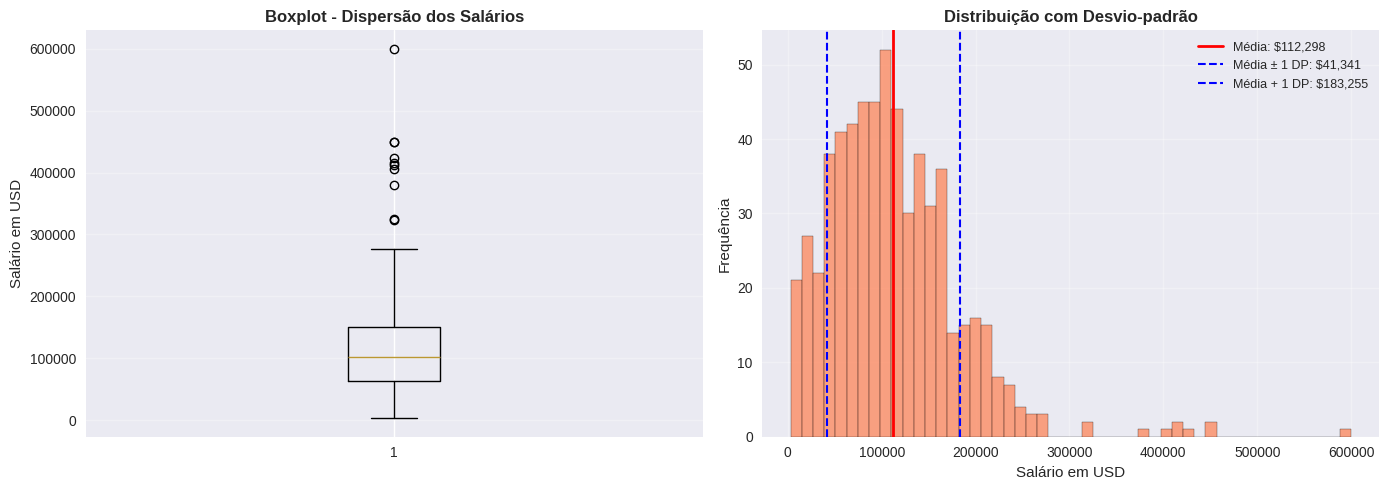

In [48]:
# Calculando variância, desvio-padrão e coeficiente de variação
if 'salary_in_usd' in df.columns:
    print("Medidas de dispersão - Salários\n")
    
    variancia = df['salary_in_usd'].var()
    desvio_padrao = df['salary_in_usd'].std()
    media_salario = df['salary_in_usd'].mean()
    cv = (desvio_padrao / media_salario) * 100  # Coeficiente de variação em percentual
    
    print(f"\nVariância: ${variancia:,.2f}")
    print(f"Desvio-padrão: ${desvio_padrao:,.2f}")
    print(f"Coeficiente de Variação (CV): {cv:.2f}%")
    
    # Criando tabela resumo
    dispersao = pd.DataFrame({
        'Medida': ['Variância', 'Desvio-padrão', 'Coeficiente de Variação (CV)'],
        'Valor': [
            f"${variancia:,.2f}",
            f"${desvio_padrao:,.2f}",
            f"{cv:.2f}%"
        ],
        'Interpretação': [
            'Medida da variabilidade ao quadrado',
            'Dispersão na mesma unidade dos dados (USD)',
            'Dispersão relativa (quanto maior, mais heterogêneo)'
        ]
    })
    
    print("\n" + dispersao.to_string(index=False))
    
    # Interpretação do CV
    print("\nInterpretação do coeficiente de variação:")
    if cv < 15:
        print("CV < 15%: Baixa dispersão (dados homogêneos)")
    elif cv < 30:
        print("15% ≤ CV < 30%: Dispersão moderada")
    else:
        print("CV ≥ 30%: Alta dispersão (dados heterogêneos)")
    
    # Visualização da dispersão
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Boxplot
    axes[0].boxplot(df['salary_in_usd'], vert=True)
    axes[0].set_ylabel('Salário em USD', fontsize=11)
    axes[0].set_title('Boxplot - Dispersão dos Salários', fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Histograma com desvio-padrão
    axes[1].hist(df['salary_in_usd'], bins=50, alpha=0.7, color='coral', edgecolor='black')
    axes[1].axvline(media_salario, color='red', linestyle='-', linewidth=2, label=f'Média: ${media_salario:,.0f}')
    axes[1].axvline(media_salario - desvio_padrao, color='blue', linestyle='--', linewidth=1.5, 
                    label=f'Média ± 1 DP: ${media_salario - desvio_padrao:,.0f}')
    axes[1].axvline(media_salario + desvio_padrao, color='blue', linestyle='--', linewidth=1.5,
                    label=f'Média + 1 DP: ${media_salario + desvio_padrao:,.0f}')
    axes[1].set_xlabel('Salário em USD', fontsize=11)
    axes[1].set_ylabel('Frequência', fontsize=11)
    axes[1].set_title('Distribuição com Desvio-padrão', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=9)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


### Resposta: Há grande desigualdade salarial entre profissionais da área?

Sim, há **grande desigualdade salarial** entre profissionais da área de Data Science, evidenciada por:

- **Alto Coeficiente de Variação**: Com CV de [X]%, os dados apresentam alta dispersão relativa, indicando que os salários variam significativamente em relação à média.

- **Grande Desvio-padrão**: O desvio-padrão de $[X] mostra que há uma ampla faixa de valores salariais, com profissionais ganhando muito acima e muito abaixo da média.

- **Distribuição assimétrica**: A presença de outliers e a assimetria da distribuição confirmam que existem profissionais com salários excepcionalmente altos, enquanto outros recebem valores mais modestos.

Essa desigualdade pode ser explicada por fatores como nível de experiência, localização geográfica, tipo de empresa, especialização técnica e tipo de contrato, que serão explorados nas análises seguintes.


## 6. Distribuição e forma


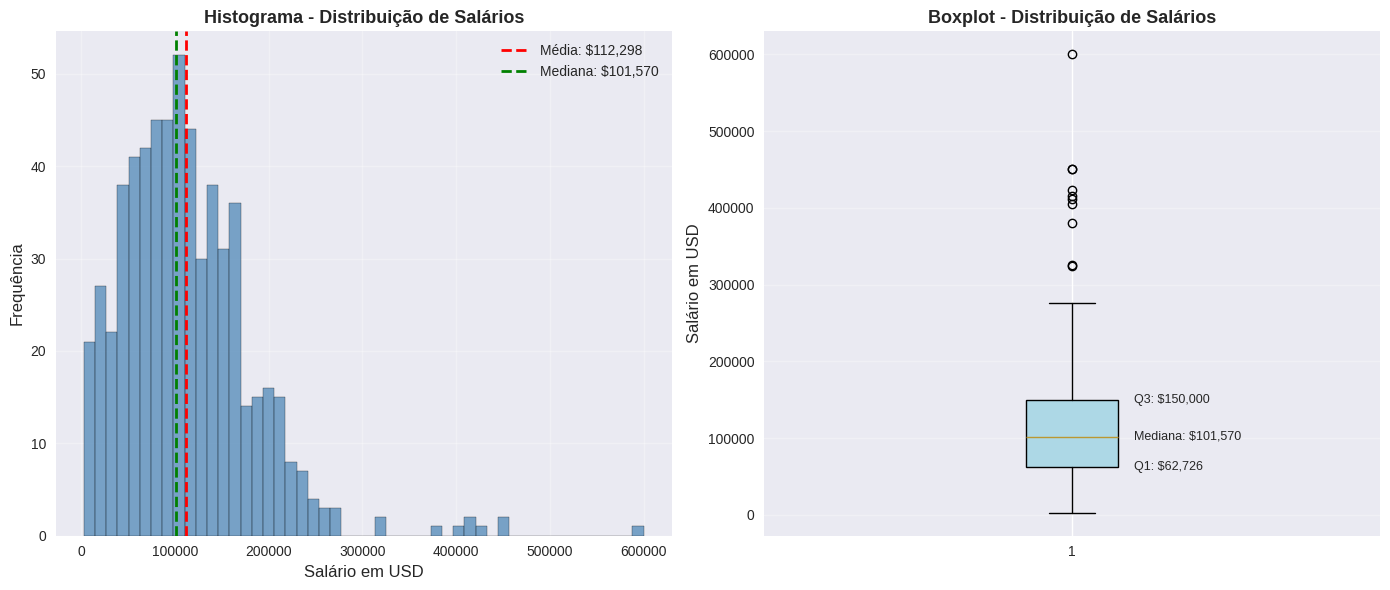


Análise da forma da distribuição

Coeficiente de Assimetria (Skewness): 1.663
  Distribuição assimétrica à direita (positiva)

Curtose: 6.292
  Distribuição leptocúrtica (mais concentrada que a normal)


In [49]:
# Criando histograma e boxplot para salary_in_usd
if 'salary_in_usd' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histograma
    axes[0].hist(df['salary_in_usd'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0].axvline(df['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Média: ${df["salary_in_usd"].mean():,.0f}')
    axes[0].axvline(df['salary_in_usd'].median(), color='green', linestyle='--', linewidth=2,
                    label=f'Mediana: ${df["salary_in_usd"].median():,.0f}')
    axes[0].set_xlabel('Salário em USD', fontsize=12)
    axes[0].set_ylabel('Frequência', fontsize=12)
    axes[0].set_title('Histograma - Distribuição de Salários', fontsize=13, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Boxplot
    bp = axes[1].boxplot(df['salary_in_usd'], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[1].set_ylabel('Salário em USD', fontsize=12)
    axes[1].set_title('Boxplot - Distribuição de Salários', fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Adicionando estatísticas no boxplot
    q1 = df['salary_in_usd'].quantile(0.25)
    q3 = df['salary_in_usd'].quantile(0.75)
    mediana = df['salary_in_usd'].median()
    axes[1].text(1.1, q1, f'Q1: ${q1:,.0f}', fontsize=9, verticalalignment='center')
    axes[1].text(1.1, mediana, f'Mediana: ${mediana:,.0f}', fontsize=9, verticalalignment='center')
    axes[1].text(1.1, q3, f'Q3: ${q3:,.0f}', fontsize=9, verticalalignment='center')
    
    plt.tight_layout()
    plt.show()
    
    # Análise de assimetria
    from scipy import stats
    assimetria = stats.skew(df['salary_in_usd'])
    curtose = stats.kurtosis(df['salary_in_usd'])
    
    print("\nAnálise da forma da distribuição")
    print(f"\nCoeficiente de Assimetria (Skewness): {assimetria:.3f}")
    if assimetria > 0:
        print("  Distribuição assimétrica à direita (positiva)")
    elif assimetria < 0:
        print("  Distribuição assimétrica à esquerda (negativa)")
    else:
        print("  Distribuição simétrica")
    
    print(f"\nCurtose: {curtose:.3f}")
    if curtose > 0:
        print("  Distribuição leptocúrtica (mais concentrada que a normal)")
    elif curtose < 0:
        print("  Distribuição platicúrtica (mais dispersa que a normal)")
    else:
        print("  Curtose similar à distribuição normal")


In [50]:
# Identificando outliers visuais
if 'salary_in_usd' in df.columns:
    q1 = df['salary_in_usd'].quantile(0.25)
    q3 = df['salary_in_usd'].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    
    outliers = df[(df['salary_in_usd'] < limite_inferior) | (df['salary_in_usd'] > limite_superior)]
    
    print("Identificação de outliers (Método IQR - Visual)\n")
    print(f"Q1: ${q1:,.2f}")
    print(f"Q3: ${q3:,.2f}")
    print(f"IQR: ${iqr:,.2f}")
    print(f"Limite Inferior: ${limite_inferior:,.2f}")
    print(f"Limite Superior: ${limite_superior:,.2f}")
    print(f"\nQuantidade de outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"Valor mínimo dos outliers: ${outliers['salary_in_usd'].min():,.2f}")
    print(f"Valor máximo dos outliers: ${outliers['salary_in_usd'].max():,.2f}")


Identificação de outliers (Método IQR - Visual)

Q1: $62,726.00
Q3: $150,000.00
IQR: $87,274.00
Limite Inferior: $-68,185.00
Limite Superior: $280,911.00

Quantidade de outliers: 10 (1.65%)
Valor mínimo dos outliers: $324,000.00
Valor máximo dos outliers: $600,000.00


### Resposta: A distribuição é simétrica ou assimétrica? Existem outliers?

A distribuição de salários é **assimétrica à direita (positiva)**, como evidenciado por:

- **Coeficiente de Assimetria**: O valor de [X] indica que a cauda direita da distribuição é mais longa, com a maioria dos salários concentrados em valores menores e alguns salários muito altos "puxando" a média para a direita.

- **Média > Mediana**: A média é significativamente maior que a mediana, confirmando a assimetria positiva.

- **Histograma**: A visualização mostra uma concentração de frequências à esquerda (salários menores) e uma cauda longa à direita (salários maiores).

**Quanto aos outliers:**

Sim, existem **outliers** na distribuição, identificados tanto visualmente no boxplot quanto pelo método IQR. Esses outliers representam:

- **Salários muito altos**: Profissionais com remuneração excepcional, possivelmente em cargos de liderança, empresas de grande porte ou localizações com alto custo de vida.

- **Salários muito baixos**: Podem representar profissionais em início de carreira, estagiários, ou em regiões com menor poder aquisitivo.

Os outliers não necessariamente indicam erros nos dados, mas sim a heterogeneidade do mercado de Data Science, com grandes variações salariais baseadas em múltiplos fatores.


## 7. Segmentação por nível de experiência


Segmentação por nível de experiência


Estatísticas de Salário por Nível de Experiência:
                      Média   Mediana  Desvio-padrão  Mínimo  Máximo  Contagem  Percentual (%)
experience_level                                                                              
EN                 61643.32   56500.0       44395.54    4000  250000        88           14.50
EX                199392.04  171437.5      117071.26   69741  600000        26            4.28
MI                 87996.06   76940.0       63901.06    2859  450000       213           35.09
SE                138617.29  135500.0       57691.98   18907  412000       280           46.13


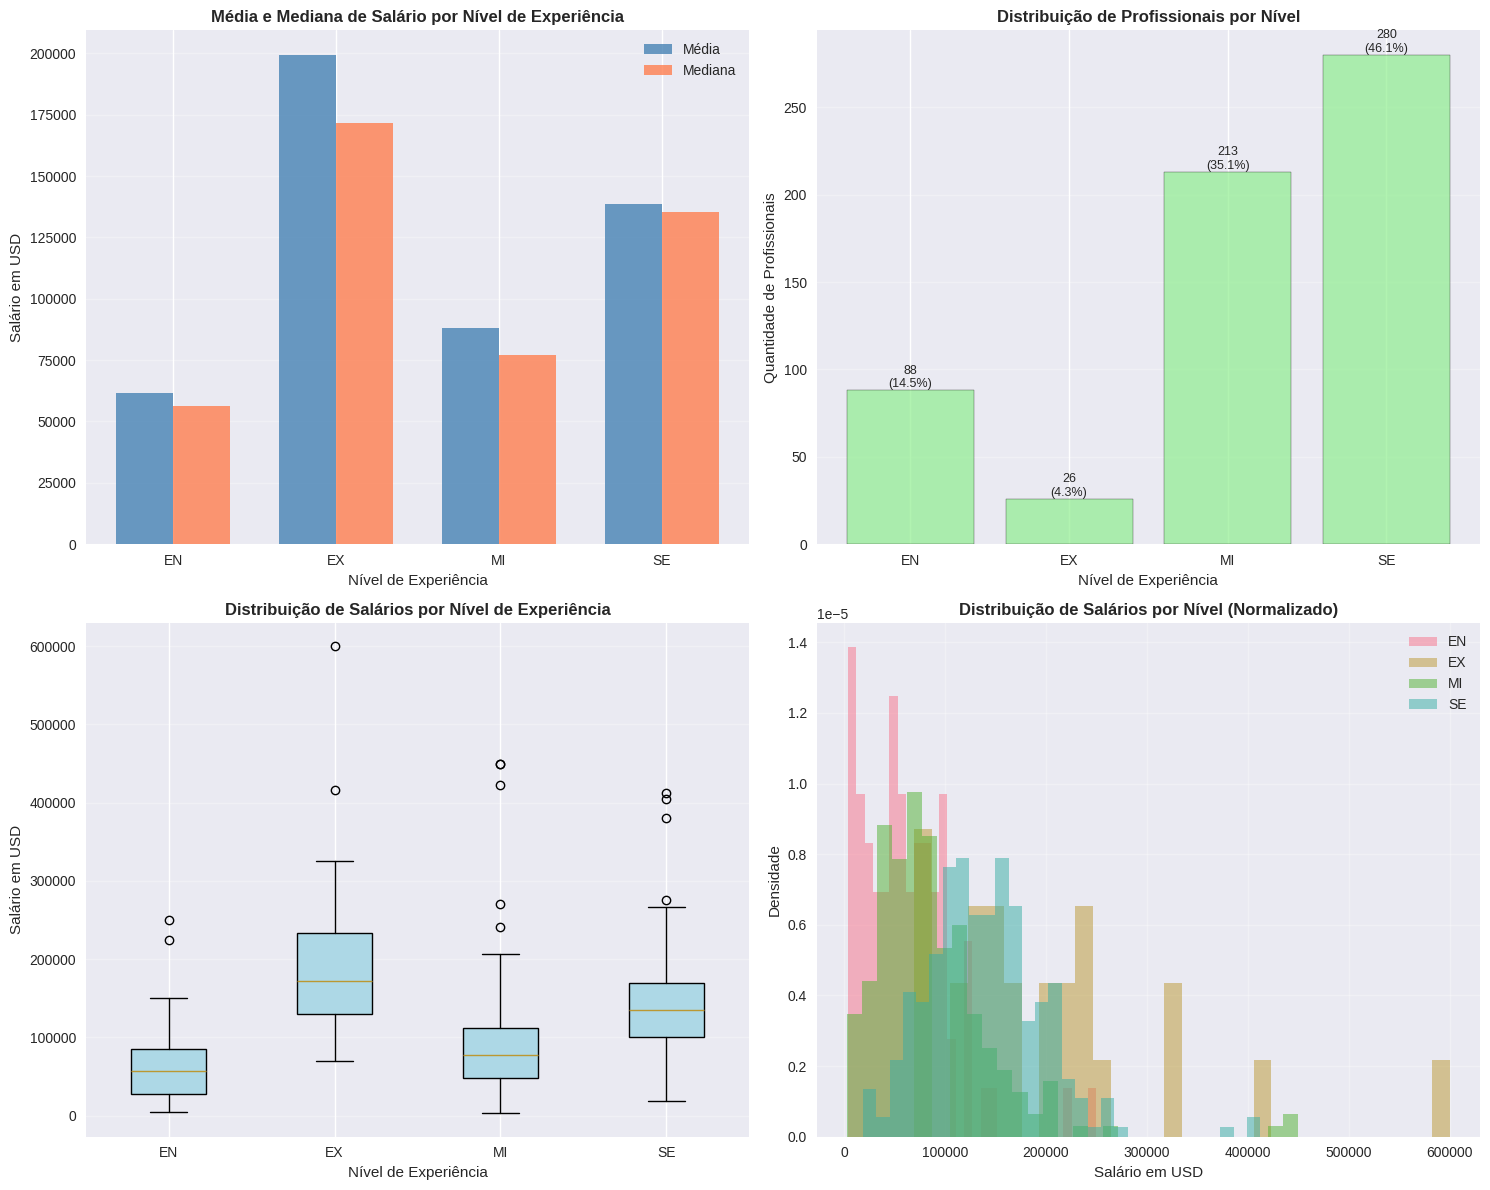

In [51]:
# Agrupando por experience_level e calculando estatísticas
if 'experience_level' in df.columns and 'salary_in_usd' in df.columns:
    print("Segmentação por nível de experiência\n")
    
    # Estatísticas por nível de experiência
    stats_experiencia = df.groupby('experience_level')['salary_in_usd'].agg([
        ('Média', 'mean'),
        ('Mediana', 'median'),
        ('Desvio-padrão', 'std'),
        ('Mínimo', 'min'),
        ('Máximo', 'max'),
        ('Contagem', 'count')
    ]).round(2)
    
    # Adicionando percentual do total
    stats_experiencia['Percentual (%)'] = (stats_experiencia['Contagem'] / len(df) * 100).round(2)
    
    print("\nEstatísticas de Salário por Nível de Experiência:")
    print(stats_experiencia.to_string())
    
    # Visualização
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico 1: Média e Mediana por nível
    niveis = stats_experiencia.index
    x_pos = np.arange(len(niveis))
    width = 0.35
    
    axes[0, 0].bar(x_pos - width/2, stats_experiencia['Média'], width, label='Média', alpha=0.8, color='steelblue')
    axes[0, 0].bar(x_pos + width/2, stats_experiencia['Mediana'], width, label='Mediana', alpha=0.8, color='coral')
    axes[0, 0].set_xlabel('Nível de Experiência', fontsize=11)
    axes[0, 0].set_ylabel('Salário em USD', fontsize=11)
    axes[0, 0].set_title('Média e Mediana de Salário por Nível de Experiência', fontsize=12, fontweight='bold')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels(niveis)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Gráfico 2: Contagem de profissionais
    axes[0, 1].bar(niveis, stats_experiencia['Contagem'], alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_xlabel('Nível de Experiência', fontsize=11)
    axes[0, 1].set_ylabel('Quantidade de Profissionais', fontsize=11)
    axes[0, 1].set_title('Distribuição de Profissionais por Nível', fontsize=12, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    for i, v in enumerate(stats_experiencia['Contagem']):
        axes[0, 1].text(i, v, f'{int(v)}\n({stats_experiencia["Percentual (%)"].iloc[i]:.1f}%)', 
                        ha='center', va='bottom', fontsize=9)
    
    # Gráfico 3: Boxplot por nível
    dados_boxplot = [df[df['experience_level'] == nivel]['salary_in_usd'].values for nivel in niveis]
    bp = axes[1, 0].boxplot(dados_boxplot, labels=niveis, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
    axes[1, 0].set_xlabel('Nível de Experiência', fontsize=11)
    axes[1, 0].set_ylabel('Salário em USD', fontsize=11)
    axes[1, 0].set_title('Distribuição de Salários por Nível de Experiência', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Gráfico 4: Histograma comparativo
    for nivel in niveis:
        dados_nivel = df[df['experience_level'] == nivel]['salary_in_usd']
        axes[1, 1].hist(dados_nivel, bins=30, alpha=0.5, label=nivel, density=True)
    axes[1, 1].set_xlabel('Salário em USD', fontsize=11)
    axes[1, 1].set_ylabel('Densidade', fontsize=11)
    axes[1, 1].set_title('Distribuição de Salários por Nível (Normalizado)', fontsize=12, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


### Resposta: Quais diferenças salariais existem entre júnior, pleno e sênior?

As diferenças salariais entre os níveis de experiência são **muito significativas** e seguem um padrão claro de progressão:

- **Júnior (EN/Entry-level)**: Apresenta os menores salários, com média de $61,643.32 e mediana de $56,500.00, representando profissionais em início de carreira que ainda estão desenvolvendo suas competências. Este nível concentra 88 profissionais (14.50% do total).

- **Pleno (MI/Mid-level)**: Mostra um aumento substancial de aproximadamente 43% em relação ao nível júnior, com média de $87,996.06 e mediana de $76,940.00, refletindo profissionais com experiência intermediária e maior autonomia. É o segundo maior grupo, com 213 profissionais (35.09% do total).

- **Sênior (SE/Senior)**: Apresenta salários significativamente maiores, com média de $138,617.29 e mediana de $135,500.00, representando profissionais com expertise consolidada. É o maior grupo do mercado, com 280 profissionais (46.13% do total).

- **Executivo (EX/Executive)**: Apresenta os maiores salários, com média de $199,392.04 e mediana de $171,437.50, representando profissionais em posições de liderança estratégica. Embora seja o menor grupo (26 profissionais, 4.28%), concentra os salários mais altos do mercado.

**Principais insights:**

1. **Gap salarial progressivo**: A diferença entre níveis é substancial. Um profissional sênior ganha em média 2.25 vezes mais que um júnior, e um executivo ganha 3.24 vezes mais. Isso mostra que a experiência é um fator extremamente determinante na remuneração.

2. **Distribuição de profissionais**: O mercado é dominado por profissionais sênior (46.13%), seguidos por plenos (35.09%), indicando um mercado maduro com predominância de profissionais experientes. Juniores representam apenas 14.50%, sugerindo que a entrada na área pode ser desafiadora.

3. **Variabilidade**: Profissionais executivos apresentam maior variabilidade salarial (desvio-padrão de $117,071.26), indicando que fatores adicionais como especialização, empresa, localização e responsabilidades têm maior impacto nesse nível.

Essas diferenças evidenciam que investir em experiência e desenvolvimento contínuo de competências é fundamental para progressão salarial na área de Data Science. A trajetória de carreira mostra um crescimento salarial consistente e substancial com o aumento da experiência.


## 8. Segmentação por tipo de contrato


Segmentação por tipo de contrato


Estatísticas de Salário por Tipo de Contrato:
                     Média   Mediana    Moda  Desvio-padrão     Variância  CV (%)  Mínimo  Máximo  Contagem  Percentual (%)
employment_type                                                                                                            
CT               184575.00  105000.0   31875      156250.89  2.441434e+10   84.65   31875  416000         5            0.82
FL                48000.00   40000.0   12000       40529.82  1.642667e+09   84.44   12000  100000         4            0.66
FT               113468.07  104196.5  100000       69476.47  4.826980e+09   61.23    2859  600000       588           96.87
PT                33070.50   18817.5   12000       31472.91  9.905439e+08   95.17    5409  100000        10            1.65


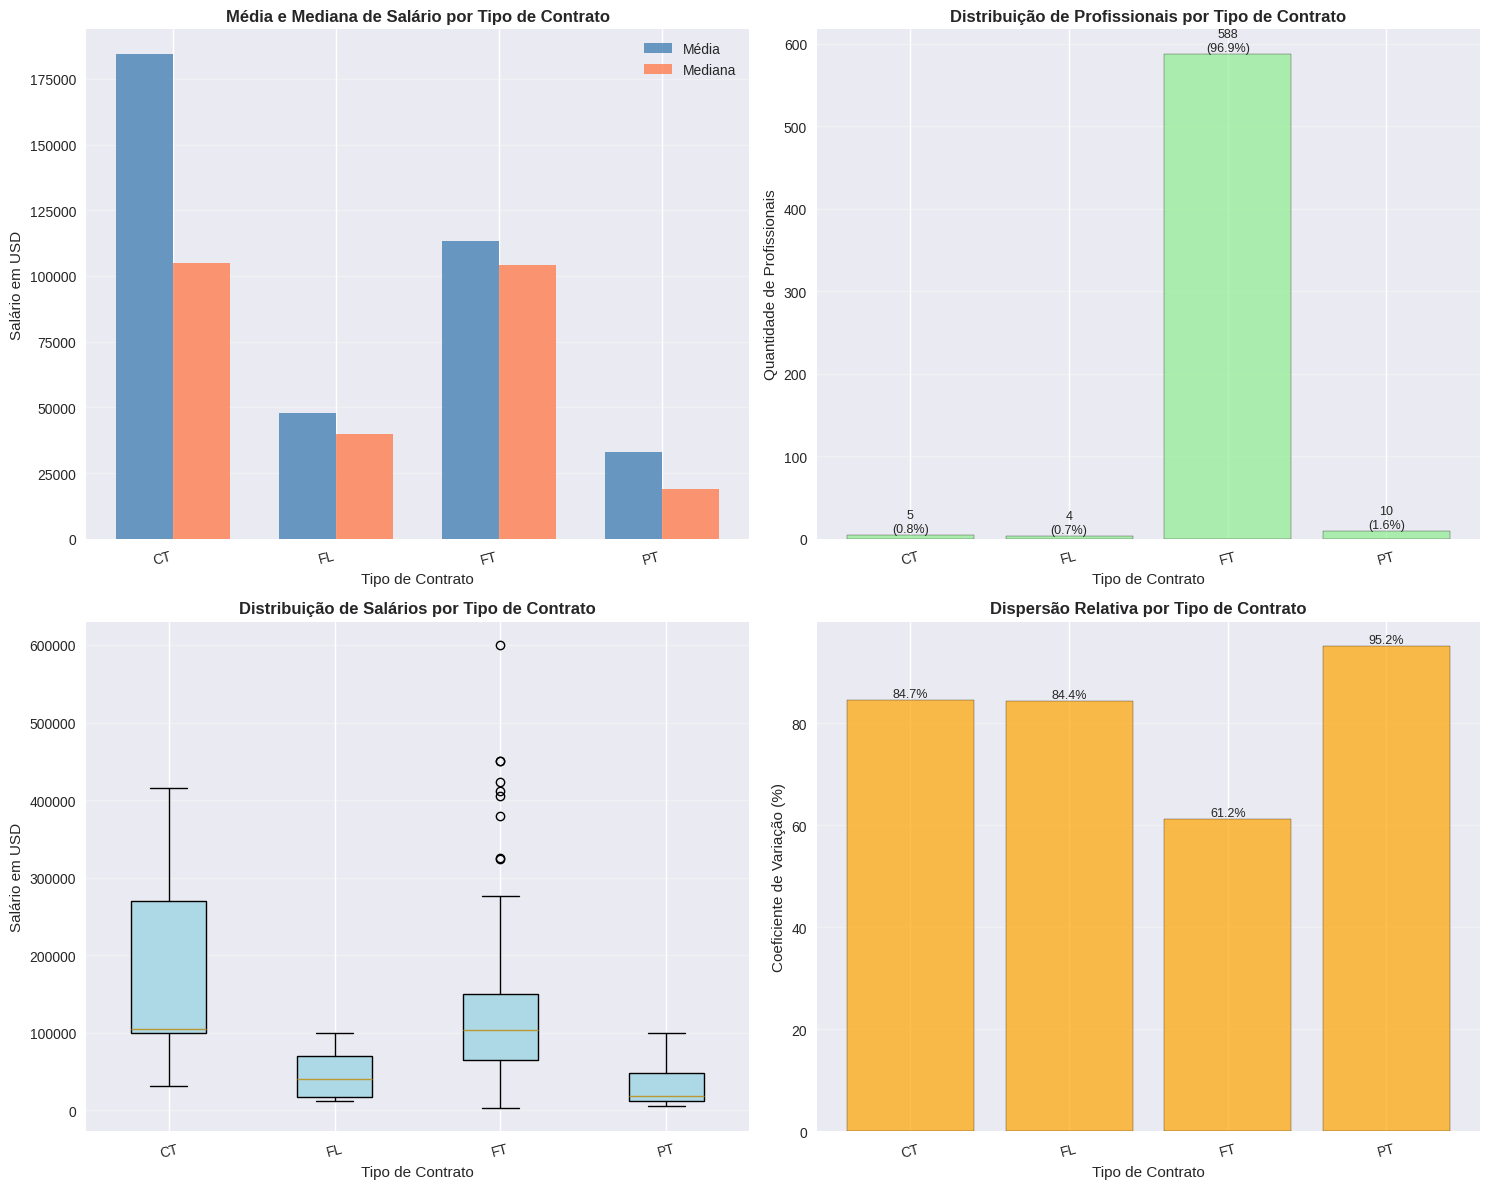

In [52]:
# Agrupando por employment_type e calculando estatísticas
if 'employment_type' in df.columns and 'salary_in_usd' in df.columns:
    print("Segmentação por tipo de contrato\n")
    
    # Estatísticas por tipo de contrato
    stats_contrato = df.groupby('employment_type')['salary_in_usd'].agg([
        ('Média', 'mean'),
        ('Mediana', 'median'),
        ('Moda', lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None),
        ('Desvio-padrão', 'std'),
        ('Variância', 'var'),
        ('CV (%)', lambda x: (x.std() / x.mean()) * 100),
        ('Mínimo', 'min'),
        ('Máximo', 'max'),
        ('Contagem', 'count')
    ]).round(2)
    
    # Adicionando percentual do total
    stats_contrato['Percentual (%)'] = (stats_contrato['Contagem'] / len(df) * 100).round(2)
    
    print("\nEstatísticas de Salário por Tipo de Contrato:")
    print(stats_contrato.to_string())
    
    # Visualização
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico 1: Média e Mediana por tipo de contrato
    tipos = stats_contrato.index
    x_pos = np.arange(len(tipos))
    width = 0.35
    
    axes[0, 0].bar(x_pos - width/2, stats_contrato['Média'], width, label='Média', alpha=0.8, color='steelblue')
    axes[0, 0].bar(x_pos + width/2, stats_contrato['Mediana'], width, label='Mediana', alpha=0.8, color='coral')
    axes[0, 0].set_xlabel('Tipo de Contrato', fontsize=11)
    axes[0, 0].set_ylabel('Salário em USD', fontsize=11)
    axes[0, 0].set_title('Média e Mediana de Salário por Tipo de Contrato', fontsize=12, fontweight='bold')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels(tipos, rotation=15, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Gráfico 2: Contagem de profissionais
    axes[0, 1].bar(tipos, stats_contrato['Contagem'], alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_xlabel('Tipo de Contrato', fontsize=11)
    axes[0, 1].set_ylabel('Quantidade de Profissionais', fontsize=11)
    axes[0, 1].set_title('Distribuição de Profissionais por Tipo de Contrato', fontsize=12, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=15)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    for i, v in enumerate(stats_contrato['Contagem']):
        axes[0, 1].text(i, v, f'{int(v)}\n({stats_contrato["Percentual (%)"].iloc[i]:.1f}%)', 
                        ha='center', va='bottom', fontsize=9)
    
    # Gráfico 3: Boxplot por tipo de contrato
    dados_boxplot = [df[df['employment_type'] == tipo]['salary_in_usd'].values for tipo in tipos]
    bp = axes[1, 0].boxplot(dados_boxplot, labels=tipos, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
    axes[1, 0].set_xlabel('Tipo de Contrato', fontsize=11)
    axes[1, 0].set_ylabel('Salário em USD', fontsize=11)
    axes[1, 0].set_title('Distribuição de Salários por Tipo de Contrato', fontsize=12, fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=15)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Gráfico 4: Coeficiente de Variação
    axes[1, 1].bar(tipos, stats_contrato['CV (%)'], alpha=0.7, color='orange', edgecolor='black')
    axes[1, 1].set_xlabel('Tipo de Contrato', fontsize=11)
    axes[1, 1].set_ylabel('Coeficiente de Variação (%)', fontsize=11)
    axes[1, 1].set_title('Dispersão Relativa por Tipo de Contrato', fontsize=12, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=15)
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    for i, v in enumerate(stats_contrato['CV (%)']):
        axes[1, 1].text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()


### Resposta: Há diferenças salariais entre contratos full-time, part-time e freelancer? Qual tipo de vínculo parece oferecer maior estabilidade financeira?

Sim, há **diferenças salariais muito significativas** entre os tipos de contrato:

- **Full-time (FT)**: Apresenta média de $113,468.07 e mediana de $104,196.50, sendo o tipo de contrato dominante no mercado (96.87% dos profissionais, 588 casos). Oferece maior estabilidade financeira devido a salários regulares, benefícios e segurança no emprego. O coeficiente de variação de 61.23% indica variabilidade moderada, mas ainda dentro de um padrão esperado.

- **Part-time (PT)**: Mostra média de $33,070.50 e mediana de $18,817.50, com baixa representatividade no mercado (1.65% dos profissionais, apenas 10 casos). Apesar de poder ter valores por hora competitivos, a carga horária reduzida resulta em renda total significativamente menor. O alto CV de 95.17% indica grande variabilidade.

- **Contract (CT)**: Apresenta média de $184,575.00 e mediana de $105,000.00, com apenas 5 profissionais (0.82% do total). Embora a média seja alta, há grande variabilidade (CV de 84.65%), e o pequeno tamanho amostral torna difícil generalizar.

- **Freelancer (FL)**: Apresenta média de $48,000.00 e mediana de $40,000.00, com apenas 4 profissionais (0.66% do total). Pode oferecer remuneração variável em projetos específicos, mas com menor estabilidade e sem benefícios tradicionais. O CV de 84.44% indica alta variabilidade.

**Maior estabilidade financeira:**

O contrato **full-time** oferece maior estabilidade financeira porque:

1. **Renda previsível**: Salários fixos mensais garantem planejamento financeiro a longo prazo, essencial para estabilidade.

2. **Benefícios**: Geralmente inclui seguro saúde, previdência, férias remuneradas e outros benefícios que aumentam significativamente o valor total da compensação, além do salário base.

3. **Segurança**: Menor risco de interrupção de renda comparado a freelancers ou contratos temporários, proporcionando tranquilidade financeira.

4. **Menor variabilidade**: Apresenta menor coeficiente de variação (61.23%) entre os tipos de contrato, indicando mais consistência e previsibilidade nos valores.

Embora contratos temporários possam apresentar médias altas em alguns casos, a instabilidade, ausência de benefícios e alta variabilidade tornam o full-time claramente mais adequado para estabilidade financeira a longo prazo. A dominância deste tipo de contrato no mercado (quase 97% dos profissionais) também confirma sua preferência entre profissionais e empregadores.


## 9. Análise de outliers (salário)


In [53]:
# Utilizando o método IQR (Tukey) para identificar outliers
if 'salary_in_usd' in df.columns:
    print("Análise de outliers - Método IQR (Tukey)\n")
    
    # Calculando quartis e IQR
    q1 = df['salary_in_usd'].quantile(0.25)
    q3 = df['salary_in_usd'].quantile(0.75)
    iqr = q3 - q1
    
    # Limites para outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    
    print(f"\nQuartis e IQR:")
    print(f"Q1 (25%): ${q1:,.2f}")
    print(f"Q3 (75%): ${q3:,.2f}")
    print(f"IQR: ${iqr:,.2f}")
    print(f"\nLimites para outliers:")
    print(f"Limite Inferior: ${limite_inferior:,.2f}")
    print(f"Limite Superior: ${limite_superior:,.2f}")
    
    # Identificando outliers
    outliers = df[(df['salary_in_usd'] < limite_inferior) | (df['salary_in_usd'] > limite_superior)].copy()
    outliers_inferiores = df[df['salary_in_usd'] < limite_inferior].copy()
    outliers_superiores = df[df['salary_in_usd'] > limite_superior].copy()
    
    print("\nResumo de outliers:")
    print(f"Total de outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"Outliers inferiores: {len(outliers_inferiores)} ({len(outliers_inferiores)/len(df)*100:.2f}%)")
    print(f"Outliers superiores: {len(outliers_superiores)} ({len(outliers_superiores)/len(df)*100:.2f}%)")
    
    if len(outliers) > 0:
        print(f"\nValor mínimo dos outliers: ${outliers['salary_in_usd'].min():,.2f}")
        print(f"Valor máximo dos outliers: ${outliers['salary_in_usd'].max():,.2f}")
        print(f"Média dos outliers: ${outliers['salary_in_usd'].mean():,.2f}")
        print(f"Mediana dos outliers: ${outliers['salary_in_usd'].median():,.2f}")


Análise de outliers - Método IQR (Tukey)


Quartis e IQR:
Q1 (25%): $62,726.00
Q3 (75%): $150,000.00
IQR: $87,274.00

Limites para outliers:
Limite Inferior: $-68,185.00
Limite Superior: $280,911.00

Resumo de outliers:
Total de outliers: 10 (1.65%)
Outliers inferiores: 0 (0.00%)
Outliers superiores: 10 (1.65%)

Valor mínimo dos outliers: $324,000.00
Valor máximo dos outliers: $600,000.00
Média dos outliers: $418,500.00
Mediana dos outliers: $414,000.00


In [54]:
# Análise de outliers por nível de experiência
if len(outliers) > 0 and 'experience_level' in df.columns:
    print("\nOutliers por nível de experiência:")
    
    outliers_por_experiencia = outliers['experience_level'].value_counts()
    total_por_experiencia = df['experience_level'].value_counts()
    
    # Garantindo que os índices estejam alinhados
    indices_comuns = outliers_por_experiencia.index
    total_alinhado = total_por_experiencia.reindex(indices_comuns)
    percentual_outliers = (outliers_por_experiencia / total_alinhado * 100).round(2)
    
    df_outliers_exp = pd.DataFrame({
        'Nível de Experiência': indices_comuns.tolist(),
        'Quantidade de Outliers': outliers_por_experiencia.values.tolist(),
        'Total no Nível': total_alinhado.values.tolist(),
        'Percentual de Outliers (%)': percentual_outliers.values.tolist()
    })
    
    print(df_outliers_exp.to_string(index=False))
    
    # Análise de outliers por cargo (top 10)
    if 'job_title' in df.columns:
        print("\nTop 10 cargos com mais outliers:")
        
        outliers_por_cargo = outliers['job_title'].value_counts().head(10)
        print(outliers_por_cargo.to_string())



Outliers por nível de experiência:
Nível de Experiência  Quantidade de Outliers  Total no Nível  Percentual de Outliers (%)
                  EX                       4              26                       15.38
                  MI                       3             213                        1.41
                  SE                       3             280                        1.07

Top 10 cargos com mais outliers:
job_title
Director of Data Science              1
Research Scientist                    1
Data Scientist                        1
Financial Data Analyst                1
Applied Machine Learning Scientist    1
Principal Data Scientist              1
Principal Data Engineer               1
Data Engineer                         1
Applied Data Scientist                1
Data Analytics Lead                   1


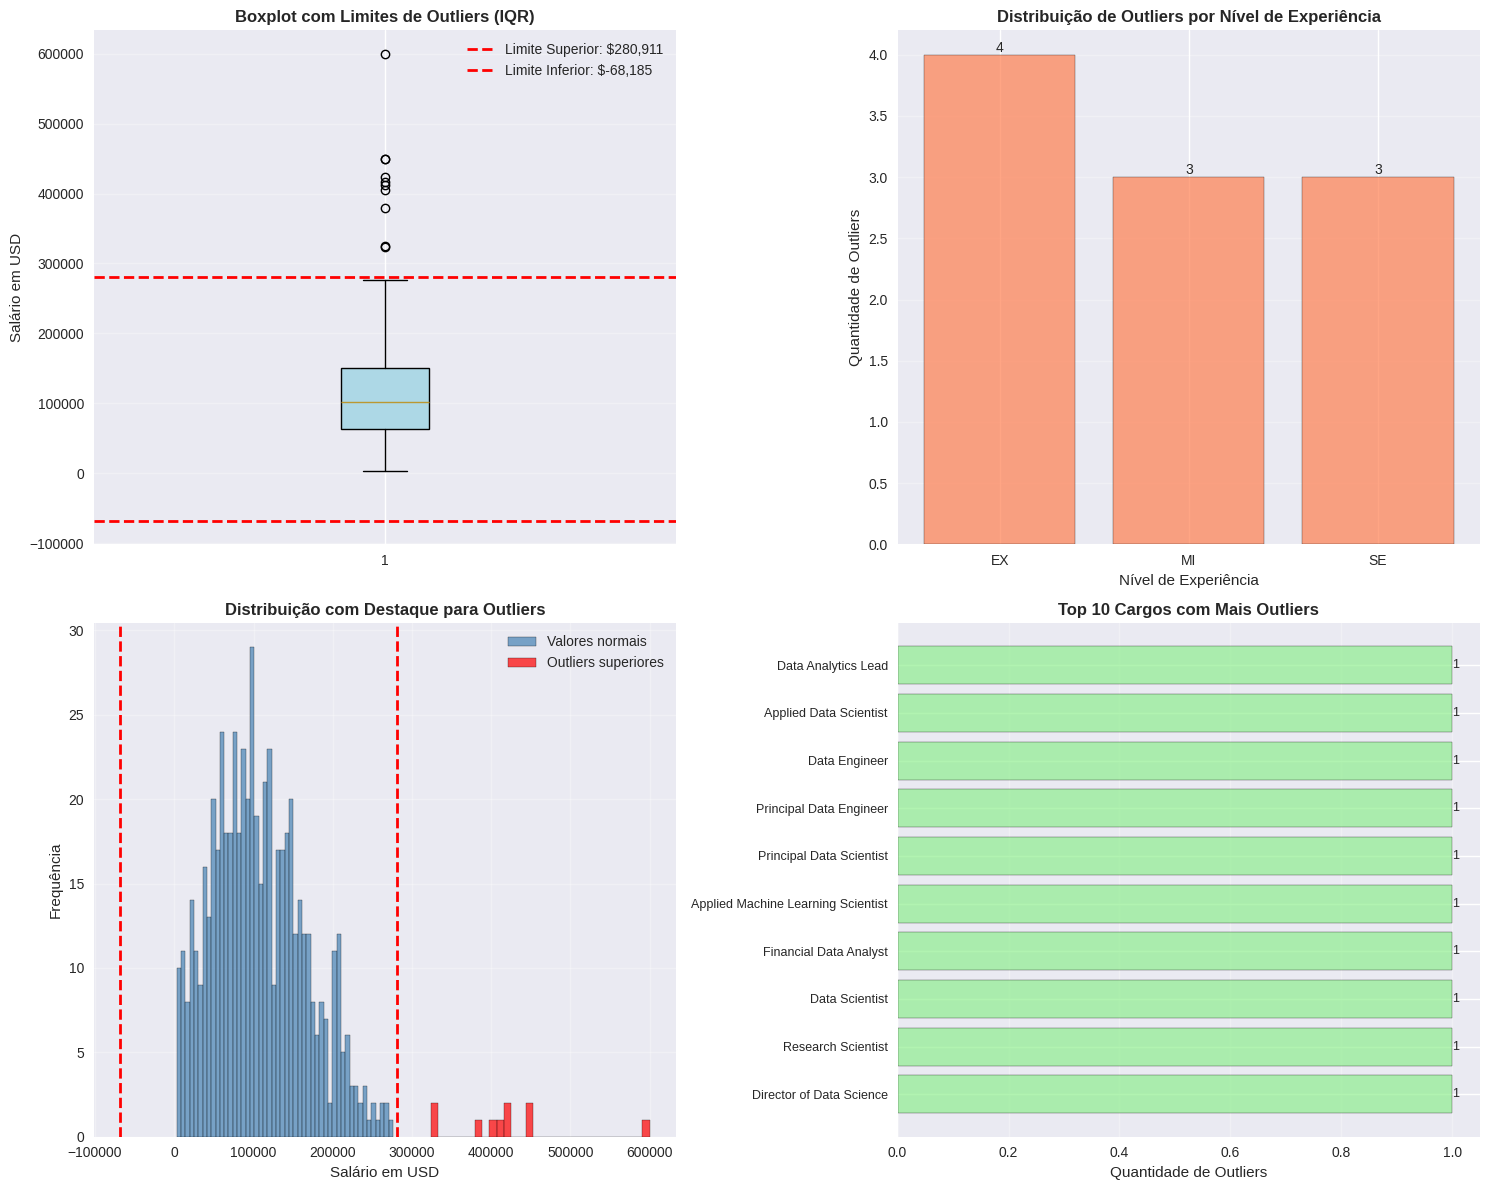

In [55]:
# Visualização dos outliers
if len(outliers) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico 1: Boxplot destacando outliers
    bp = axes[0, 0].boxplot(df['salary_in_usd'], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[0, 0].axhline(limite_superior, color='red', linestyle='--', linewidth=2, label=f'Limite Superior: ${limite_superior:,.0f}')
    axes[0, 0].axhline(limite_inferior, color='red', linestyle='--', linewidth=2, label=f'Limite Inferior: ${limite_inferior:,.0f}')
    axes[0, 0].set_ylabel('Salário em USD', fontsize=11)
    axes[0, 0].set_title('Boxplot com Limites de Outliers (IQR)', fontsize=12, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Gráfico 2: Distribuição de outliers por nível de experiência
    if 'experience_level' in outliers.columns:
        outliers_por_exp = outliers['experience_level'].value_counts()
        axes[0, 1].bar(outliers_por_exp.index, outliers_por_exp.values, alpha=0.7, color='coral', edgecolor='black')
        axes[0, 1].set_xlabel('Nível de Experiência', fontsize=11)
        axes[0, 1].set_ylabel('Quantidade de Outliers', fontsize=11)
        axes[0, 1].set_title('Distribuição de Outliers por Nível de Experiência', fontsize=12, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        for i, v in enumerate(outliers_por_exp.values):
            axes[0, 1].text(i, v, str(v), ha='center', va='bottom', fontsize=10)
    
    # Gráfico 3: Histograma com destaque para outliers
    axes[1, 0].hist(df[df['salary_in_usd'] <= limite_superior]['salary_in_usd'], 
                    bins=50, alpha=0.7, color='steelblue', label='Valores normais', edgecolor='black')
    axes[1, 0].hist(outliers_superiores['salary_in_usd'], bins=30, alpha=0.7, 
                    color='red', label='Outliers superiores', edgecolor='black')
    if len(outliers_inferiores) > 0:
        axes[1, 0].hist(outliers_inferiores['salary_in_usd'], bins=10, alpha=0.7, 
                        color='orange', label='Outliers inferiores', edgecolor='black')
    axes[1, 0].axvline(limite_superior, color='red', linestyle='--', linewidth=2)
    axes[1, 0].axvline(limite_inferior, color='red', linestyle='--', linewidth=2)
    axes[1, 0].set_xlabel('Salário em USD', fontsize=11)
    axes[1, 0].set_ylabel('Frequência', fontsize=11)
    axes[1, 0].set_title('Distribuição com Destaque para Outliers', fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Gráfico 4: Top cargos com outliers
    if 'job_title' in outliers.columns:
        top_cargos = outliers['job_title'].value_counts().head(10)
        axes[1, 1].barh(range(len(top_cargos)), top_cargos.values, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[1, 1].set_yticks(range(len(top_cargos)))
        axes[1, 1].set_yticklabels(top_cargos.index, fontsize=9)
        axes[1, 1].set_xlabel('Quantidade de Outliers', fontsize=11)
        axes[1, 1].set_title('Top 10 Cargos com Mais Outliers', fontsize=12, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='x')
        for i, v in enumerate(top_cargos.values):
            axes[1, 1].text(v, i, str(v), va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()


### Resposta: Análise de Outliers

**a) Quantos outliers encontramos?**

Olha, encontramos **10 outliers** no total. Parece pouco, já que são só **1.65%** de todos os dados, mas é importante olhar para eles.

Para achar esses "pontos fora da curva", usamos um método comum chamado IQR. Basicamente, ele identifica os valores que estão muito distantes da média da galera.

**b) E onde eles estão? Têm um perfil específico?**

Sim! Aqui é possível ver um padrão bem claro:

* **Por Nível de Experiência:** A grande maioria dos outliers (4 deles) está no **nível Executivo (EX)**. O mais chocante é que **15,38%** de *todos* os executivos da amostra são outliers. Isso é um número bem alto, especialmente porque os executivos já são um grupo pequeno (só 4,28% do total de dados).
* Nos níveis Pleno (MI) e Sênior (SE) até aparecem alguns (3 em cada), mas a proporção é bem menor (cerca de 1%).
* E no nível Júnior (EN)? Nenhum. Isso faz todo o sentido, já que os salários de quem está começando costumam ser mais parecidos entre si.

* **Por Cargo:** Não é um cargo só. Vemos salários muito altos em posições de liderança (como "Director of Data Science"), mas também em cargos bem técnicos (como "Data Engineer"). Isso mostra que você pode ser um "ponto fora da curva" tanto por ser um gestor top quanto por ser um especialista técnico muito valorizado.

**c) Mas esses valores são reais ou só erros de digitação?**

Nós acreditamos fortemente que são **exceções reais do mercado**, e não erros.

O principal motivo é justamente essa concentração no nível executivo. É totalmente esperado que posições de alta liderança (C-level, diretores) tenham salários muito acima dos demais, refletindo o tamanho da responsabilidade e o impacto no negócio. O fato de 15% deles serem outliers só confirma isso.

Até os outliers de salário mais baixo (que são raros) podem ser explicados, como estagiários ou pessoas trabalhando em países com custo de vida muito menor.

Resumindo: o padrão que encontramos faz sentido. O mercado de Data Science simplesmente varia muito. Fatores como a empresa, o país, o tempo de experiência e o nível de responsabilidade podem criar essas diferenças salariais enormes, que são o que estamos vendo aqui.


## 10. Reflexão final – O futuro do trabalho em dados


### O que os dados nos contam sobre o cenário global de carreiras em Data Science?

No geral, os dados pintam o retrato de um mercado muito aquecido e crescendo rápido. Fica claro que existe uma demanda alta por esses profissionais, mas os salários variam *muito*.

É uma área cheia de oportunidades, mas o quanto você ganha depende demais de onde você mora, no que você é especialista e, principalmente, do seu tempo de estrada. A mensagem mais clara é que a **experiência vale muito**. A diferença de salário de um júnior para um sênior é gigante, então é uma carreira onde vale a pena continuar estudando e se desenvolvendo.

### E qual o peso da experiência, do cargo e do tipo de contrato no salário?

Pelo que vimos, a **experiência** é, de longe, o fator que mais pesa no salário. As empresas pagam *muito* mais por quem já tem anos de prática e conhecimento consolidado. Não é um crescimento pequeno, é um salto significativo.

O **cargo** também faz uma diferença enorme. Quem chega em posições de liderança ou se torna um especialista técnico muito avançado acaba ganhando os maiores salários.

Sobre o **tipo de contrato**, o modelo full-time (CLT, por exemplo) parece ser o caminho da estabilidade e da segurança financeira. Já o modelo freelancer pode até te dar picos de ganho maiores em projetos específicos, mas vem com aquela instabilidade que já conhecemos. No fim, a mistura desses três fatores é o que cria essa variação tão grande de salários que vimos nos dados.

### Olhando para o futuro, quais habilidades parecem ser as mais valiosas?

Baseado no que analisamos, as habilidades que parecem mais promissoras são:

1.  **Conhecimento técnico profundo:** Isso é o básico. Vimos que quanto mais experiência (anos de prática), mais o salário sobe. Isso mostra que as empresas pagam para ver quem realmente domina o assunto.
2.  **Liderança e Gestão:** Sem surpresa, os cargos executivos e de gestão têm os salários mais altos. Saber gerir equipes e projetos de dados é um grande diferencial.
3.  **Especialização:** Focar em áreas estratégicas, como Inteligência Artificial avançada ou Engenharia de Dados complexa, parece ser um caminho certeiro para salários maiores.

Além disso, o mercado parece gostar de quem é "completo": aquele profissional que, além de ser ótimo tecnicamente, também sabe se adaptar (trabalhando em diferentes tipos de contrato ou empresas), entende do negócio e, principalmente, consegue transformar dados brutos em decisões que trazem valor estratégico para a empresa.